# Which genes are most differentially expressed between basal and non-basal breast cancer samples?

In [1]:
import pandas as pd

df = pd.read_csv("breastcancer.csv")
df.head()


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [2]:
df['type'].value_counts()


,count
type,
basal,41
HER,30
luminal_B,30
luminal_A,29
cell_line,14
normal,7


In [3]:
df['basal_status'] = (df['type'] == 'basal').astype(int)
df['basal_status'].value_counts()


,count
basal_status,
0,110
1,41


In [5]:
meta_cols = ['samples', 'type', 'basal_status']
gene_df = df.drop(columns=meta_cols)


In [6]:
basal = gene_df[df['basal_status'] == 1]
non_basal = gene_df[df['basal_status'] == 0]


In [7]:
from scipy.stats import ttest_ind

results = []

for gene in gene_df.columns:
    t_stat, p_val = ttest_ind(
        basal[gene],
        non_basal[gene],
        equal_var=False
    )
    diff = basal[gene].mean() - non_basal[gene].mean()
    results.append([gene, diff, p_val])


In [8]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=['Gene', 'Mean_Difference', 'P_Value']
)

results_df = results_df.sort_values('P_Value')
results_df.head(10)


,Gene,Mean_Difference,P_Value
36216,226961_at,-2.839093,1.137676e-32
44295,235046_at,-2.278558,5.176182e-31
38404,229150_at,-3.841995,1.348478e-29
14823,205376_at,-2.321743,8.525250e-29
27496,218211_s_at,-3.804738,8.548010e-29
33690,224428_s_at,2.881295,8.781905e-29
20474,211110_s_at,-2.763311,1.393413e-28
10382,200934_at,1.291501,3.957414e-28
20946,211621_at,-2.462258,9.735886e-28
37556,228302_x_at,-2.526001,2.906065e-27


In [9]:
results_df.head(10)


,Gene,Mean_Difference,P_Value
36216,226961_at,-2.839093,1.137676e-32
44295,235046_at,-2.278558,5.176182e-31
38404,229150_at,-3.841995,1.348478e-29
14823,205376_at,-2.321743,8.525250e-29
27496,218211_s_at,-3.804738,8.548010e-29
33690,224428_s_at,2.881295,8.781905e-29
20474,211110_s_at,-2.763311,1.393413e-28
10382,200934_at,1.291501,3.957414e-28
20946,211621_at,-2.462258,9.735886e-28
37556,228302_x_at,-2.526001,2.906065e-27


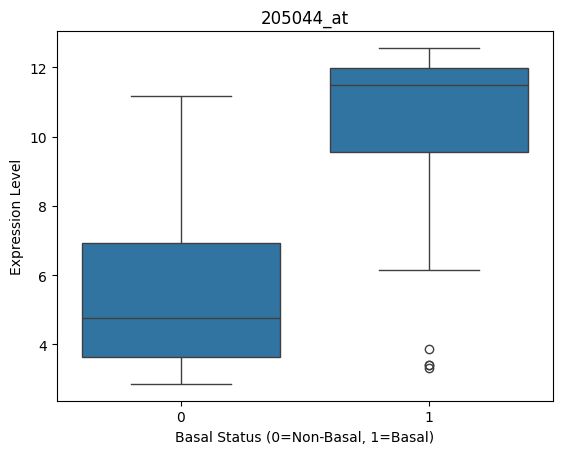

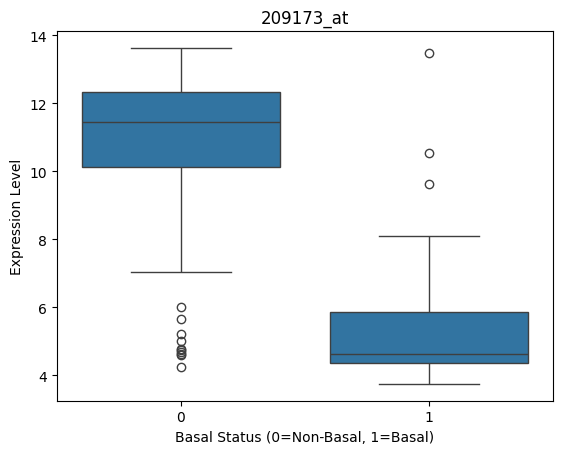

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top_up = results_df.sort_values('Mean_Difference', ascending=False).iloc[0]['Gene']
top_down = results_df.sort_values('Mean_Difference').iloc[0]['Gene']

# Boxplot
for probe in [top_up, top_down]:
    sns.boxplot(x=df['basal_status'], y=df[probe])
    plt.title(probe)
    plt.xlabel('Basal Status (0=Non-Basal, 1=Basal)')
    plt.ylabel('Expression Level')
    plt.show()


In [11]:
gene = '205044_at'
mean_diff = results_df.loc[results_df['Gene'] == gene, 'Mean_Difference'].values[0]

if mean_diff > 0:
    print(f"{gene} is upregulated in Basal (higher in 1)")
else:
    print(f"{gene} is downregulated in Basal (higher in 0)")


205044_at is upregulated in Basal (higher in 1)


In [12]:
top_up = results_df.sort_values('Mean_Difference', ascending=False).iloc[0]['Gene']
top_down = results_df.sort_values('Mean_Difference').iloc[0]['Gene']
middle = results_df.sort_values('Mean_Difference').iloc[len(results_df)//2]['Gene']


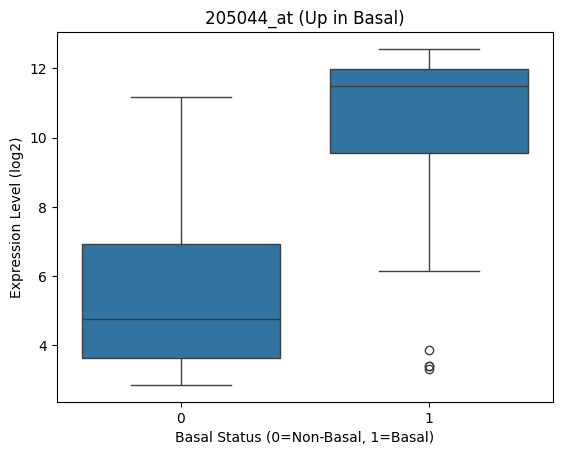

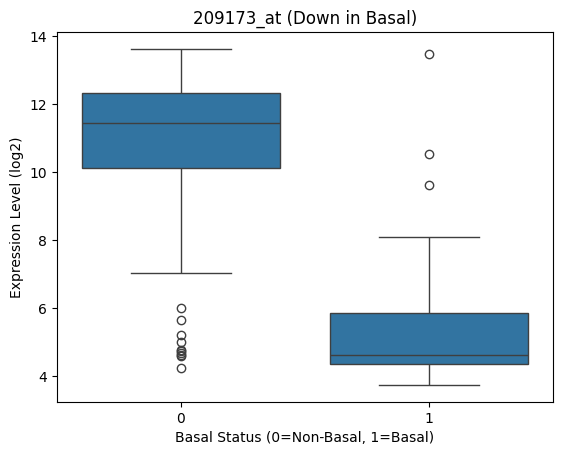

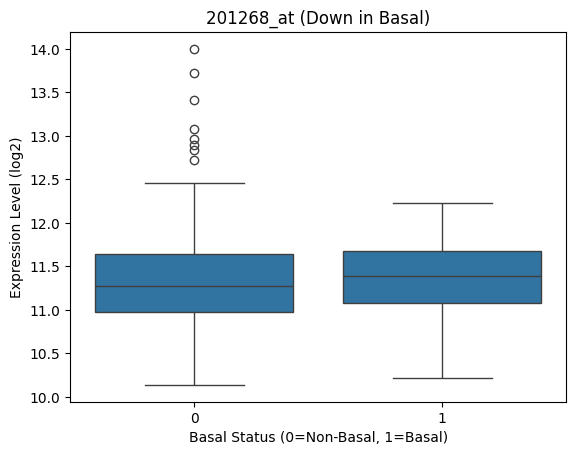

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for gene in [top_up, top_down, middle]:
    mean_diff = results_df.loc[results_df['Gene'] == gene, 'Mean_Difference'].values[0]
    label = "Up in Basal" if mean_diff > 0 else "Down in Basal"

    sns.boxplot(x=df['basal_status'], y=df[gene])
    plt.title(f"{gene} ({label})")
    plt.xlabel('Basal Status (0=Non-Basal, 1=Basal)')
    plt.ylabel('Expression Level (log2)')
    plt.show()


Differential expression analysis between basal and non-basal breast cancer samples identified multiple genes significantly associated with the basal subtype. For example, probe 224428_s_at showed higher expression in basal samples (mean difference = +2.88, p < 1e-28), while probe 226961_at showed higher expression in non-basal samples (mean difference = -2.84, p < 1e-32). These results suggest subtype-specific transcriptional programs.